### __Import Libraries__

In [97]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import RobustScaler

from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, recall_score, roc_auc_score, precision_score, f1_score

import warnings
warnings.filterwarnings('ignore')

### __Load Dataset__

In [14]:
df = pd.read_csv('hotel_bookings.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [15]:
df = df.iloc[:5002] #data terlalu besar

In [16]:
df = df[['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]

In [17]:
df

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4999,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
5000,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0


In [18]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        2
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

In [19]:
df

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4999,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
5000,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0


### __Drop Missing Values__

In [23]:
df = df.dropna()

In [24]:
df

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4999,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
5000,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0


In [25]:
df.isna().sum()

hotel                          0
is_canceled                    0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
reserved_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
required_car_parking_spaces    0
total_of_special_requests      0
dtype: int64

### __Data Exploration__

In [59]:
df['is_canceled'].value_counts()

0    2702
1    2298
Name: is_canceled, dtype: int64

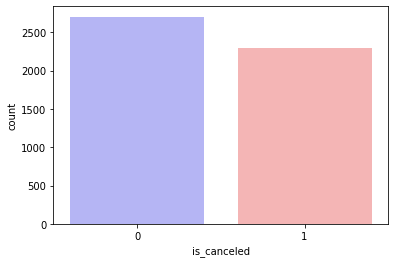

In [60]:
sns.countplot(x=df['is_canceled'], data=df, palette='bwr')
plt.show()

### __Data Visualization : Customer Profiling__

Berdasarkan data, mayoritas customer ada dua orang adult, tidak membawa anak dan bayi, berasal dari Portugal.

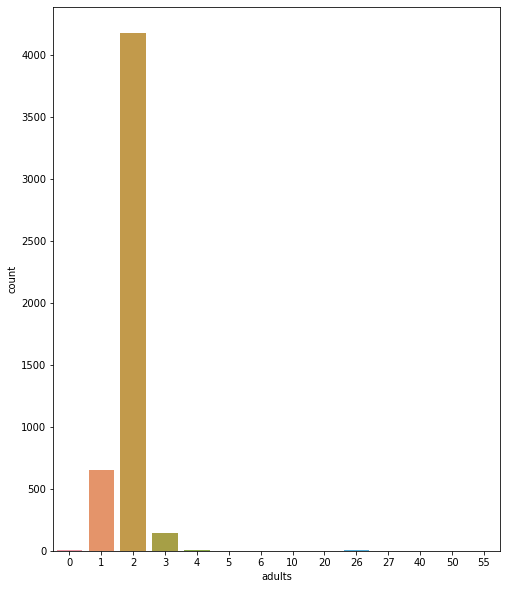

In [51]:
plt.figure(figsize=(8,10))
sns.countplot(x = 'adults', data = df)
plt.show()

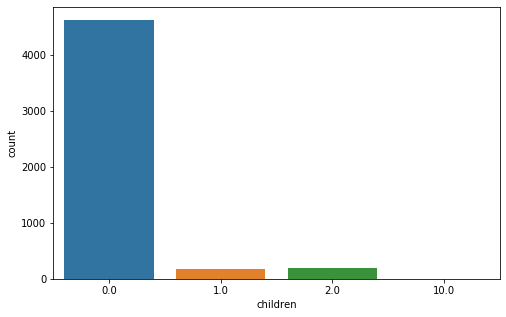

In [29]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'children', data = df)
plt.show()

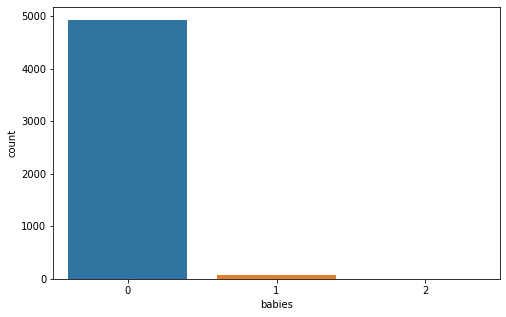

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x = 'babies', data = df)
plt.show()

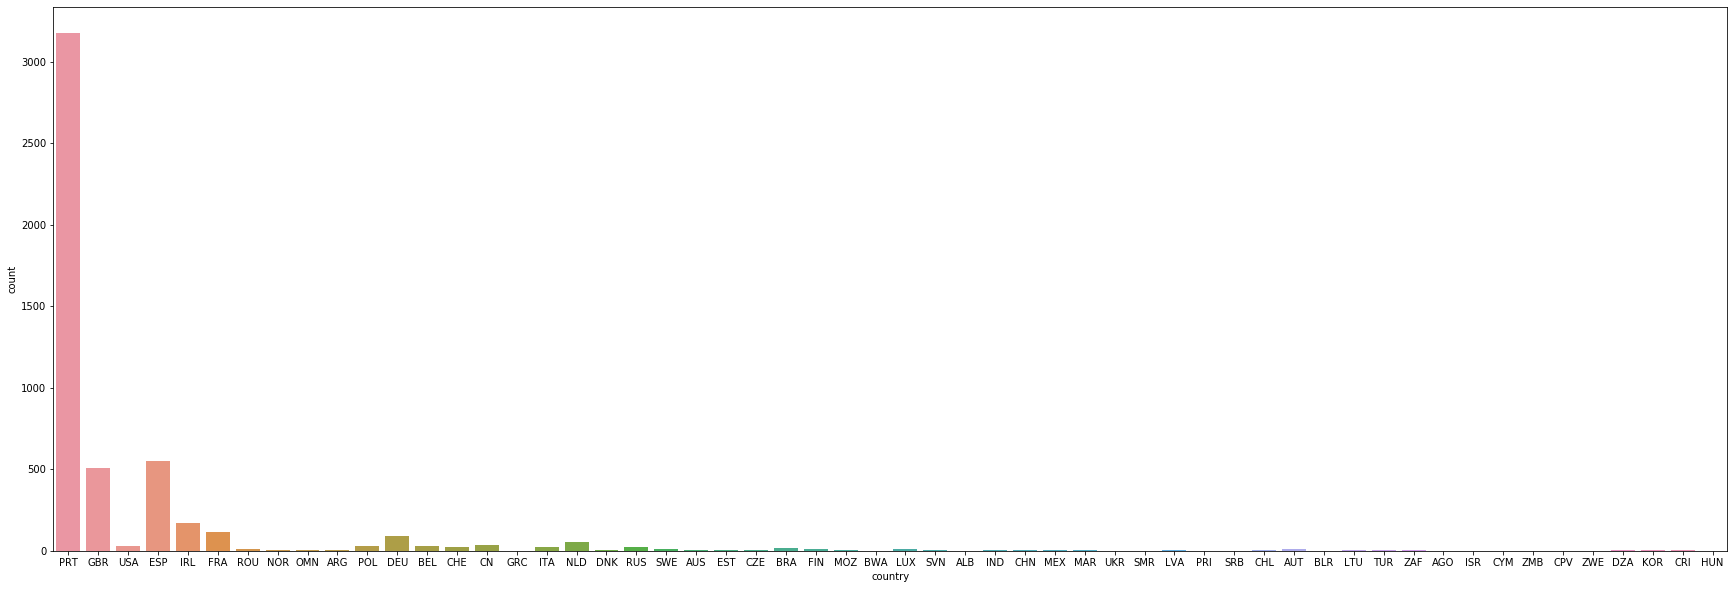

In [50]:
plt.figure(figsize=(30,10))
sns.countplot(x = 'country', data = df)
plt.show()

### __Data Visualization : Customer Behavior__

Berdasarkan data, mayoritas customer memesan bed and breakfast, room tipe A, tidak melakukan perubahan pada pesanannya, tidak menggunakan deposit, tidak membutuhkan slot parking, tidak meminta special requests, market segment dari online travel agent dan channel distribution dari travel agent atau tour operators. 

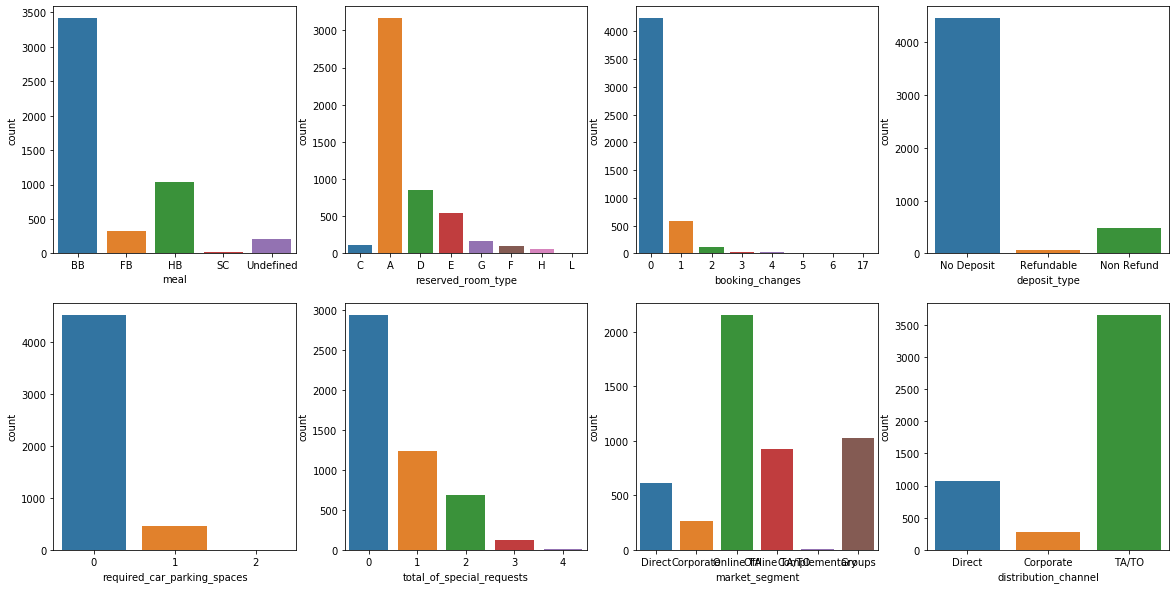

In [58]:
plt.figure(figsize=(20,10))

plt.subplot(241)
sns.countplot(x = 'meal', data = df)

plt.subplot(242)
sns.countplot(x = 'reserved_room_type', data = df)

plt.subplot(243)
sns.countplot(x = 'booking_changes', data = df)

plt.subplot(244)
sns.countplot(x = 'deposit_type', data = df)

plt.subplot(245)
sns.countplot(x = 'required_car_parking_spaces', data = df)

plt.subplot(246)
sns.countplot(x = 'total_of_special_requests', data = df)

plt.subplot(247)
sns.countplot(x = 'market_segment', data = df)

plt.subplot(248)
sns.countplot(x = 'distribution_channel', data = df)

plt.show()

## **Data Preparation : Encoding**

In [62]:
df

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,BB,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,BB,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,BB,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,BB,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4999,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
5000,Resort Hotel,1,2,0.0,0,HB,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0


In [63]:
df['meal'].unique()

array(['BB', 'FB', 'HB', 'SC', 'Undefined'], dtype=object)

In [104]:
df1 = df.copy()
meal_dict = {'BB': 1, 'FB': 2, 'HB': 3, 'SC': 4, 'Undefined': 5}
df1['meal'] = df1.meal.map(meal_dict)
df1

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,1,PRT,Direct,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,1,PRT,Direct,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,1,GBR,Direct,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,1,GBR,Corporate,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,1,GBR,Online TA,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,Resort Hotel,1,2,0.0,0,3,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,3,PRT,Groups,Direct,A,0,Non Refund,0,Transient,0,0
4999,Resort Hotel,1,2,0.0,0,3,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0
5000,Resort Hotel,1,2,0.0,0,3,PRT,Groups,Direct,D,0,Non Refund,0,Transient,0,0


In [105]:
df['market_segment'].unique()

array(['Direct', 'Corporate', 'Online TA', 'Offline TA/TO',
       'Complementary', 'Groups'], dtype=object)

In [106]:
ms_dict = {'Direct': 1, 'Corporate': 2, 'Online TA': 3, 'Offline TA/TO': 4, 'Complementary': 5, 'Groups': 6}
df1['market_segment'] = df1.market_segment.map(ms_dict)
df1

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,1,PRT,1,Direct,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,1,PRT,1,Direct,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,1,GBR,1,Direct,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,1,GBR,2,Corporate,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,1,GBR,3,TA/TO,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,Resort Hotel,1,2,0.0,0,3,PRT,6,Direct,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,3,PRT,6,Direct,A,0,Non Refund,0,Transient,0,0
4999,Resort Hotel,1,2,0.0,0,3,PRT,6,Direct,D,0,Non Refund,0,Transient,0,0
5000,Resort Hotel,1,2,0.0,0,3,PRT,6,Direct,D,0,Non Refund,0,Transient,0,0


In [107]:
df['distribution_channel'].unique()

array(['Direct', 'Corporate', 'TA/TO'], dtype=object)

In [108]:
dc_dict = {'Direct': 1, 'Corporate': 2, 'TA/TO': 3}
df1['distribution_channel'] = df1.distribution_channel.map(dc_dict)
df1

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,1,PRT,1,1,C,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,1,PRT,1,1,C,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,1,GBR,1,1,A,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,1,GBR,2,2,A,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,1,GBR,3,3,A,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,Resort Hotel,1,2,0.0,0,3,PRT,6,1,A,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,3,PRT,6,1,A,0,Non Refund,0,Transient,0,0
4999,Resort Hotel,1,2,0.0,0,3,PRT,6,1,D,0,Non Refund,0,Transient,0,0
5000,Resort Hotel,1,2,0.0,0,3,PRT,6,1,D,0,Non Refund,0,Transient,0,0


In [109]:
df['reserved_room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'L'], dtype=object)

In [110]:
rrt_dict = {'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7, 'H': 8, 'I': 9, 'J': 10, 'K': 11, 'L': 12}
df1['reserved_room_type'] = df1.reserved_room_type.map(rrt_dict)
df1

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,1,PRT,1,1,3,3,No Deposit,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,1,PRT,1,1,3,4,No Deposit,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,1,GBR,1,1,1,0,No Deposit,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,1,GBR,2,2,1,0,No Deposit,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,1,GBR,3,3,1,0,No Deposit,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,Resort Hotel,1,2,0.0,0,3,PRT,6,1,1,0,Non Refund,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,3,PRT,6,1,1,0,Non Refund,0,Transient,0,0
4999,Resort Hotel,1,2,0.0,0,3,PRT,6,1,4,0,Non Refund,0,Transient,0,0
5000,Resort Hotel,1,2,0.0,0,3,PRT,6,1,4,0,Non Refund,0,Transient,0,0


In [111]:
df['deposit_type'].unique()

array(['No Deposit', 'Refundable', 'Non Refund'], dtype=object)

In [112]:
dt_dict = {'No Deposit': 1, 'Refundable': 2, 'Non Refund': 3}
df1['deposit_type'] = df1.deposit_type.map(dt_dict)
df1

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,1,PRT,1,1,3,3,1,0,Transient,0,0
1,Resort Hotel,0,2,0.0,0,1,PRT,1,1,3,4,1,0,Transient,0,0
2,Resort Hotel,0,1,0.0,0,1,GBR,1,1,1,0,1,0,Transient,0,0
3,Resort Hotel,0,1,0.0,0,1,GBR,2,2,1,0,1,0,Transient,0,0
4,Resort Hotel,0,2,0.0,0,1,GBR,3,3,1,0,1,0,Transient,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,Resort Hotel,1,2,0.0,0,3,PRT,6,1,1,0,3,0,Transient,0,0
4998,Resort Hotel,1,2,0.0,0,3,PRT,6,1,1,0,3,0,Transient,0,0
4999,Resort Hotel,1,2,0.0,0,3,PRT,6,1,4,0,3,0,Transient,0,0
5000,Resort Hotel,1,2,0.0,0,3,PRT,6,1,4,0,3,0,Transient,0,0


In [113]:
df['customer_type'].unique()

array(['Transient', 'Contract', 'Transient-Party', 'Group'], dtype=object)

In [114]:
ct_dict = {'Transient': 1, 'Contract': 2, 'Transient-Party': 3, 'Group': 4}
df1['customer_type'] = df1.customer_type.map(ct_dict)
df1

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,Resort Hotel,0,2,0.0,0,1,PRT,1,1,3,3,1,0,1,0,0
1,Resort Hotel,0,2,0.0,0,1,PRT,1,1,3,4,1,0,1,0,0
2,Resort Hotel,0,1,0.0,0,1,GBR,1,1,1,0,1,0,1,0,0
3,Resort Hotel,0,1,0.0,0,1,GBR,2,2,1,0,1,0,1,0,0
4,Resort Hotel,0,2,0.0,0,1,GBR,3,3,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,Resort Hotel,1,2,0.0,0,3,PRT,6,1,1,0,3,0,1,0,0
4998,Resort Hotel,1,2,0.0,0,3,PRT,6,1,1,0,3,0,1,0,0
4999,Resort Hotel,1,2,0.0,0,3,PRT,6,1,4,0,3,0,1,0,0
5000,Resort Hotel,1,2,0.0,0,3,PRT,6,1,4,0,3,0,1,0,0


In [115]:
df['hotel'].unique()

array(['Resort Hotel'], dtype=object)

In [116]:
h_dict = {'Resort Hotel': 1}
df1['hotel'] = df1.hotel.map(h_dict)
df1

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,1,0,2,0.0,0,1,PRT,1,1,3,3,1,0,1,0,0
1,1,0,2,0.0,0,1,PRT,1,1,3,4,1,0,1,0,0
2,1,0,1,0.0,0,1,GBR,1,1,1,0,1,0,1,0,0
3,1,0,1,0.0,0,1,GBR,2,2,1,0,1,0,1,0,0
4,1,0,2,0.0,0,1,GBR,3,3,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,1,1,2,0.0,0,3,PRT,6,1,1,0,3,0,1,0,0
4998,1,1,2,0.0,0,3,PRT,6,1,1,0,3,0,1,0,0
4999,1,1,2,0.0,0,3,PRT,6,1,4,0,3,0,1,0,0
5000,1,1,2,0.0,0,3,PRT,6,1,4,0,3,0,1,0,0


In [117]:
from sklearn.preprocessing import LabelEncoder

In [118]:
df1['country'] = LabelEncoder().fit_transform(df1['country'])
df1

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,1,0,2,0.0,0,1,43,1,1,3,3,1,0,1,0,0
1,1,0,2,0.0,0,1,43,1,1,3,4,1,0,1,0,0
2,1,0,1,0.0,0,1,24,1,1,1,0,1,0,1,0,0
3,1,0,1,0.0,0,1,24,2,2,1,0,1,0,1,0,0
4,1,0,2,0.0,0,1,24,3,3,1,0,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4997,1,1,2,0.0,0,3,43,6,1,1,0,3,0,1,0,0
4998,1,1,2,0.0,0,3,43,6,1,1,0,3,0,1,0,0
4999,1,1,2,0.0,0,3,43,6,1,4,0,3,0,1,0,0
5000,1,1,2,0.0,0,3,43,6,1,4,0,3,0,1,0,0


In [119]:
df1 = df1.reset_index(drop=True)

## **Data Preparation : Check Outliers**

In [78]:
def find_outlier(yourList):
    q1 = yourList.describe()['25%']
    q2 = yourList.describe()['50%']
    q3 = yourList.describe()['75%']
    iqr = q3 - q1
    batas_bawah = q1 - 1.5 * iqr
    batas_atas = q3 + 1.5 * iqr
    outlier = []
    for i in yourList:
        if i < batas_bawah or i > batas_atas:
            outlier.append(i)
    return outlier

In [94]:
kolom = ['hotel', 'is_canceled', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

In [96]:
for i in kolom:
    print(i)
    print("Jumlah Outlier =", len(find_outlier(df1[i])))
    print("Outlier =", find_outlier(df1[i]))
    print(" ")

hotel
Jumlah Outlier = 0
Outlier = []
 
is_canceled
Jumlah Outlier = 0
Outlier = []
 
adults
Jumlah Outlier = 823
Outlier = [1, 1, 1, 3, 3, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 1, 1, 4, 1, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 1, 3, 1, 3, 3, 1, 3, 3, 3, 1, 1, 3, 3, 1, 3, 4, 1, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 3, 1, 3, 3, 3, 1, 3, 1, 3, 3, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 1, 1, 4, 1, 1, 3, 1, 1, 3, 1, 1, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1, 3, 3, 1, 1, 1, 3, 1, 1, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 1, 40, 3, 1, 1, 3, 1, 26, 1, 1, 3, 3, 1, 50, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 3, 1, 1, 1, 26, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 26, 3, 1, 1, 27, 1, 1, 1, 3, 27, 3, 1, 1, 26, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 26, 1, 55, 1, 1, 1, 1, 0, 20, 6, 5, 1, 1, 1, 1, 1, 1, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

In [120]:
kolom2 = ['hotel', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']

### __Scaling__

In [121]:
for i in kolom2:
    df1[i] = RobustScaler().fit_transform(df1[[i]])

In [122]:
df1

,hotel,is_canceled,adults,children,babies,meal,country,market_segment,distribution_channel,reserved_room_type,booking_changes,deposit_type,days_in_waiting_list,customer_type,required_car_parking_spaces,total_of_special_requests
0,0.0,0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.666667,3.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0,0.0,0.0,0.0,0.0,0.0,-2.0,-2.0,0.666667,4.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0,-1.0,0.0,0.0,0.0,-1.0,-2.0,-2.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0,-1.0,0.0,0.0,0.0,-1.0,-1.0,-1.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,0.0,1,0.0,0.0,0.0,1.0,0.0,3.0,-2.0,0.000000,0.0,2.0,0.0,0.0,0.0,0.0
4996,0.0,1,0.0,0.0,0.0,1.0,0.0,3.0,-2.0,0.000000,0.0,2.0,0.0,0.0,0.0,0.0
4997,0.0,1,0.0,0.0,0.0,1.0,0.0,3.0,-2.0,1.000000,0.0,2.0,0.0,0.0,0.0,0.0
4998,0.0,1,0.0,0.0,0.0,1.0,0.0,3.0,-2.0,1.000000,0.0,2.0,0.0,0.0,0.0,0.0


### **Features Selection**

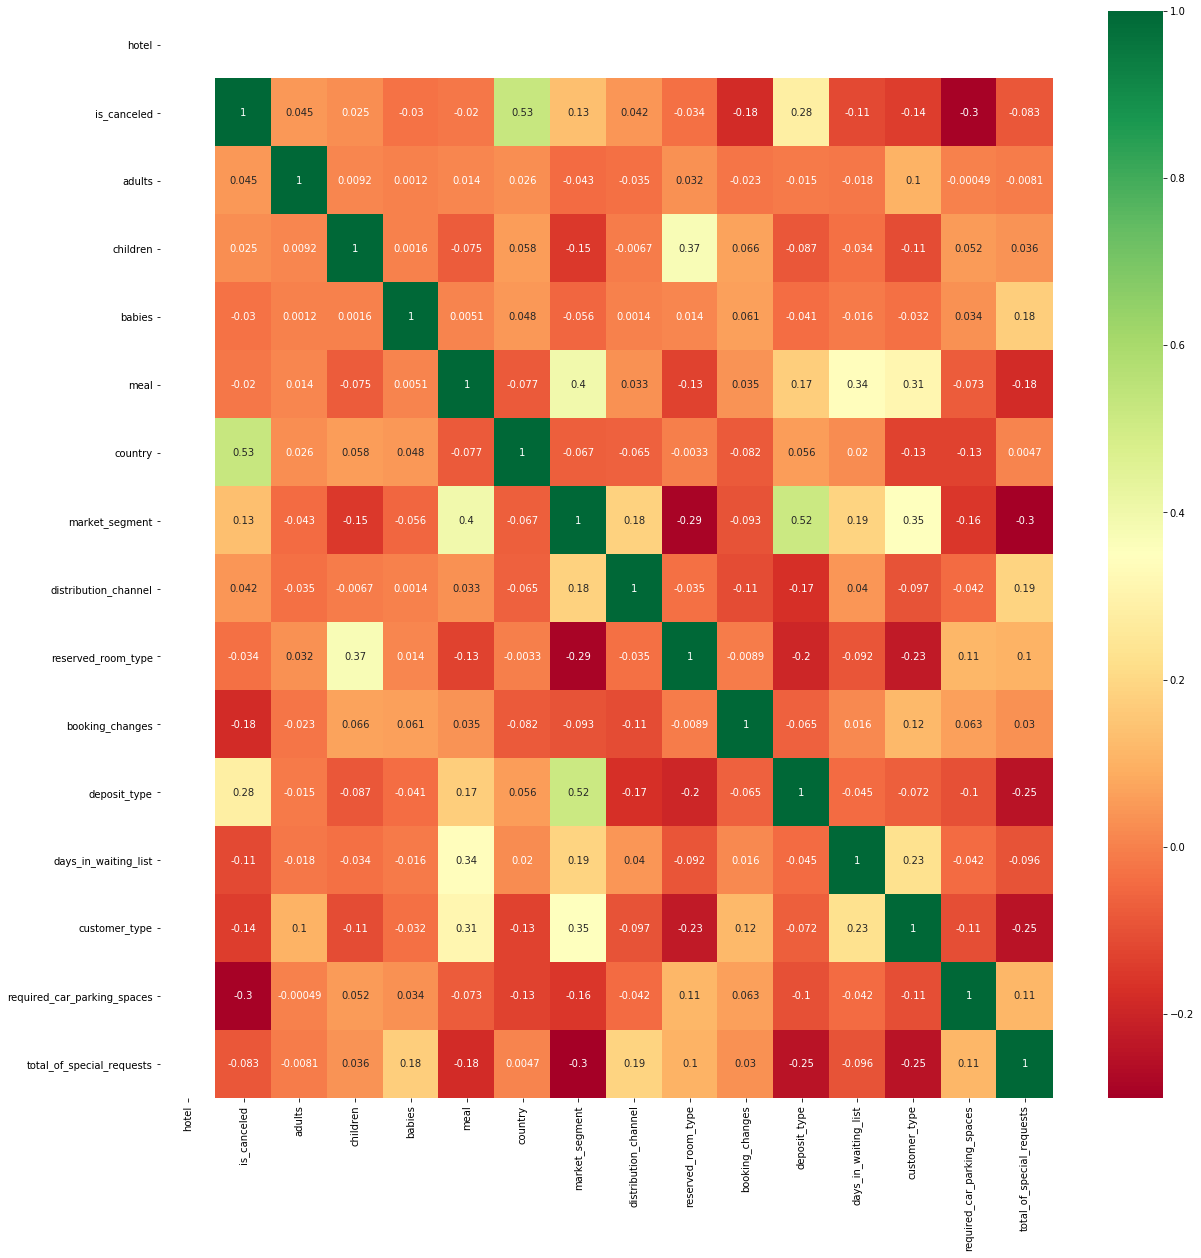

In [123]:
#get correlations of each features in dataset
corrmat = df1.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))

#plot heat map
g=sns.heatmap(df1[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [127]:
from sklearn.ensemble import ExtraTreesClassifier

In [131]:
X = df1[['hotel', 'adults', 'children', 'babies', 'meal', 'country', 'market_segment', 'distribution_channel', 'reserved_room_type', 'booking_changes', 'deposit_type', 'days_in_waiting_list', 'customer_type', 'required_car_parking_spaces', 'total_of_special_requests']]  #independent columns/feature non target
y = df1['is_canceled']    #target column

In [132]:
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers

[0.         0.04090393 0.01363519 0.00475415 0.03680621 0.44789045
 0.05629588 0.02549322 0.04241441 0.04029381 0.08255715 0.01721214
 0.05696544 0.09974167 0.03503634]


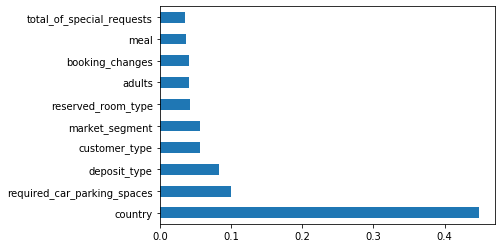

In [134]:
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()
# feat_importances

In [135]:
df2 = df1[['is_canceled','country', 'required_car_parking_spaces','deposit_type','customer_type','market_segment','reserved_room_type','adults','booking_changes','meal','total_of_special_requests']]

In [136]:
df2

,is_canceled,country,required_car_parking_spaces,deposit_type,customer_type,market_segment,reserved_room_type,adults,booking_changes,meal,total_of_special_requests
0,0,0.0,0.0,0.0,0.0,-2.0,0.666667,0.0,3.0,0.0,0.0
1,0,0.0,0.0,0.0,0.0,-2.0,0.666667,0.0,4.0,0.0,0.0
2,0,-1.0,0.0,0.0,0.0,-2.0,0.000000,-1.0,0.0,0.0,0.0
3,0,-1.0,0.0,0.0,0.0,-1.0,0.000000,-1.0,0.0,0.0,0.0
4,0,-1.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
4995,1,0.0,0.0,2.0,0.0,3.0,0.000000,0.0,0.0,1.0,0.0
4996,1,0.0,0.0,2.0,0.0,3.0,0.000000,0.0,0.0,1.0,0.0
4997,1,0.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.0,1.0,0.0
4998,1,0.0,0.0,2.0,0.0,3.0,1.000000,0.0,0.0,1.0,0.0


### __Splitting Dataset__

In [143]:
x = df2.drop(['is_canceled'], axis=1)
y = df2['is_canceled']

In [144]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state=0)

### __Model Before Tuning__

In [145]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [146]:
# menyimpan model algoritma ke dalam variabel 'models'
models = [
    ['Logistic Regression : ', LogisticRegression()],
    ['DecisionTree : ', DecisionTreeClassifier()],
    ['RandomForest : ', RandomForestClassifier()],
]

Model yang dipilih ialah:
### 1. Logistic Regression
### Logistic regression is a supervised learning classification algorithm used to predict the probability of a target variable. The nature of target or dependent variable is dichotomous, which means there would be only two possible classes. In simple words, the dependent variable is binary in nature having data coded as either 1 (stands for success/yes) or 0 (stands for failure/no).
### 2. Decision Tree Classifier =
### Decision tree analysis is a predictive modelling tool that can be applied across many areas. Decision trees can be constructed by an algorithmic approach that can split the dataset in different ways based on different conditions. Decisions trees are the most powerful algorithms that falls under the category of supervised algorithms.
### 3. Random Forest Classifier =
### Random forest is a supervised learning algorithm which is used for both classification as well as regression. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees means more robust forest. Similarly, random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method which is better than a single decision tree because it reduces the over-fitting by averaging the result.

LogisticRegression()
 
               Score (%)
accuracy       82.700000
recall         90.289256
precision      77.619893
roc_auc_score  82.935326
f1_score       83.476600
 
              precision    recall  f1-score   support

           0       0.89      0.76      0.82       516
           1       0.78      0.90      0.83       484

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.84      0.83      0.83      1000



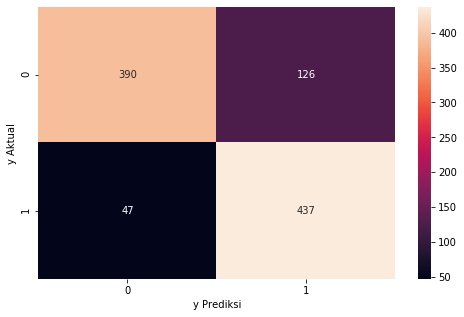

DecisionTreeClassifier()
 
               Score (%)
accuracy       85.900000
recall         85.330579
precision      85.507246
roc_auc_score  85.882344
f1_score       85.418821
 
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       516
           1       0.86      0.85      0.85       484

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



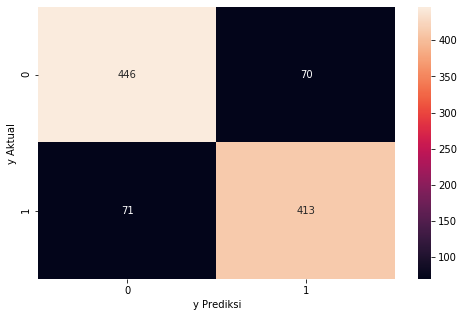

RandomForestClassifier()
 
               Score (%)
accuracy       85.900000
recall         85.743802
precision      85.215606
roc_auc_score  85.895157
f1_score       85.478888
 
              precision    recall  f1-score   support

           0       0.87      0.86      0.86       516
           1       0.85      0.86      0.85       484

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



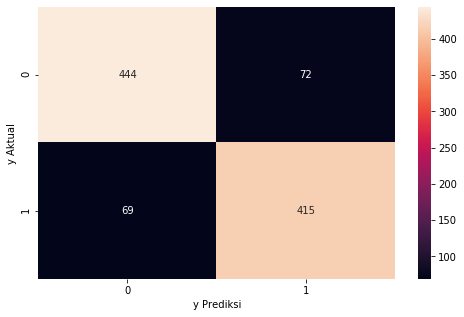

In [152]:
for name, model in models:
    model = model
     # model belajar dari data train
    model.fit(X_train, y_train)
    # membuat prediksi dan fungsinya untuk mengevaluasi model (dibandingkan dengan y aktual)
    y_pred = model.predict(X_test)
    
    hasil = pd.DataFrame(data = [accuracy_score(y_test, y_pred)*100, recall_score(y_test, y_pred)*100,
                        precision_score(y_test, y_pred)*100, roc_auc_score(y_test, y_pred)*100,
                        f1_score(y_test, y_pred)*100],
                        index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
                        columns = ['Score (%)'])
    print(model)
    print(" ")
    print(hasil)
    print(" ")
    # Confusion matrix report
    print(classification_report(y_test, y_pred))
    # untuk menampilkan visualisasi confusion matrix
    f, ax = plt.subplots(figsize=(8,5))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', ax=ax)
    plt.xlabel('y Prediksi')
    plt.ylabel('y Aktual')
    plt.show()

#### Jenis kesalahan yang paling berpengaruh pada kerugian finansial perusahaan adalah apabila machine learning memprediksi user tidak membatalkan pesanan, padahal sebenarnya/realisasinya user cancel booking (membatalkan pesanan). Hal ini dikarenakan tidak adanya revenue dan adanya beban biaya yang sudah dikeluarkan untuk memberi layanan penjemputan di bandara/stasiun/terminal apabila diperlukan. Selain itu juga membuat hotel kehilangan revenue dari menolak pengunjung lain yang memesan kamar yang telah dipesan (booked room).

### Evaluation metric yang bisa menekan jenis kesalahan yang saya pilih ialah: Recall.
### Target 0 = not cancelled, 1 = cancelled.
### Kesalahan yang harus ditekan ialah yang Predicted 0 Actual 1 (False Negative).
### Alasan: Karena apabila False Negative semakin kecil, nilai Recall akan semakin besar.

### Langkah untuk meningkatkan performa model ML untuk bisa menekan jenis kesalahan tersebut mencoba hyper parameter tuning.

# __Hyperparameter Tuning__

In [214]:
# parameter model logistic regression yang akan dituned + value di setiap parameter
penalty = ['l1', 'l2', 'elasticnet', 'none']
solver = ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga']
max_iter = [1, 10, 100, 1000, 10000]

# simpan dalam variabel dengan nama 'param'
param = {'penalty': penalty, 'solver': solver, 'max_iter': max_iter}
param

{'penalty': ['l1', 'l2', 'elasticnet', 'none'],
 'solver': ['newton-cg', 'lbfgs', 'liblinier', 'sag', 'saga'],
 'max_iter': [1, 10, 100, 1000, 10000]}

In [215]:
model_LR = LogisticRegression()
model_LR_GS = GridSearchCV(model_LR, param, cv = 5)

In [216]:
model_LR_GS.fit(X_train, y_train)
model_LR_GS.best_params_

{'max_iter': 10, 'penalty': 'l2', 'solver': 'newton-cg'}

In [240]:
model_LogReg_GS = LogisticRegression(solver='newton-cg', penalty = 'l2', max_iter = 10)
model_LogReg_GS.fit(X_train, y_train)

LogisticRegression(max_iter=10, solver='newton-cg')

In [241]:
y_pred_GS = model_LogReg_GS.predict(x_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,82.700000
recall,90.289256
precision,77.619893
roc_auc_score,82.935326
f1_score,83.476600


              precision    recall  f1-score   support

           0       0.89      0.76      0.82       516
           1       0.78      0.90      0.83       484

    accuracy                           0.83      1000
   macro avg       0.83      0.83      0.83      1000
weighted avg       0.84      0.83      0.83      1000



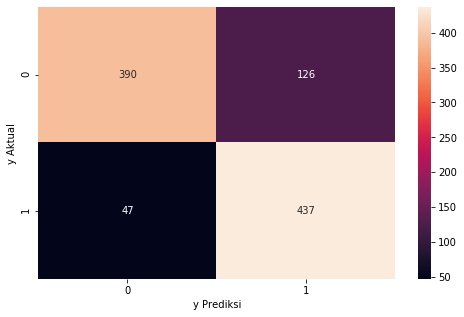

In [237]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [201]:
# parameter model Random Forest Classifier yang akan dituned + value di setiap parameter
min_samples_leaf = [1, 2, 4]
min_samples_split = [2, 5, 10]

# simpan dalam variabel dengan nama 'param'
param = {'min_samples_leaf': min_samples_leaf, 'min_samples_split': min_samples_split}
param

{'min_samples_leaf': [1, 2, 4], 'min_samples_split': [2, 5, 10]}

In [202]:
model_RF =  RandomForestClassifier()
model_RF_GS = GridSearchCV(model_RF, param, cv = 5)

In [203]:
model_RF_GS.fit(X_train, y_train)
model_RF_GS.best_params_

{'min_samples_leaf': 1, 'min_samples_split': 2}

In [204]:
model_RF_GS = RandomForestClassifier(min_samples_leaf=1, min_samples_split=2)
model_RF_GS.fit(X_train, y_train)

RandomForestClassifier()

In [205]:
y_pred_GS = model_RF_GS.predict(x_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,86.000000
recall,86.363636
precision,84.959350
roc_auc_score,86.011276
f1_score,85.655738


              precision    recall  f1-score   support

           0       0.87      0.86      0.86       516
           1       0.85      0.86      0.86       484

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



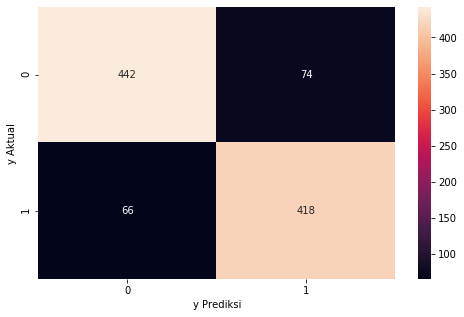

In [206]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()

In [207]:
# parameter model decision tree yang akan dituned + value di setiap parameter
min_samples_split = [2, 3, 4]
min_samples_leaf = [1, 5, 10, 20, 50, 100]
max_depth = [4,6,8,12]

# simpan dalam variabel dengan nama 'param'
param = {'min_samples_split': min_samples_split, 'min_samples_leaf': min_samples_leaf, 'max_depth': max_depth}
param

{'min_samples_split': [2, 3, 4],
 'min_samples_leaf': [1, 5, 10, 20, 50, 100],
 'max_depth': [4, 6, 8, 12]}

In [208]:
model_DT = DecisionTreeClassifier()
model_DT_GS = GridSearchCV(model_DT, param, cv = 5)

In [209]:
model_DT.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [210]:
model_DT_GS.fit(X_train, y_train)
model_DT_GS.best_params_

{'max_depth': 12, 'min_samples_leaf': 1, 'min_samples_split': 3}

In [220]:
model_DT_GS = DecisionTreeClassifier(max_depth = 12, min_samples_leaf = 1, min_samples_split = 3)
model_DT_GS.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=12, min_samples_split=3)

In [221]:
y_pred_GS = model_DT_GS.predict(x_test)

pd.DataFrame(data = [accuracy_score(y_test, y_pred_GS)*100, recall_score(y_test, y_pred_GS)*100,
                    precision_score(y_test, y_pred_GS)*100, roc_auc_score(y_test, y_pred_GS)*100,
                    f1_score(y_test, y_pred_GS)*100],
            index = ['accuracy', 'recall', 'precision', 'roc_auc_score', 'f1_score'],
            columns = ['Score (%)'])

,Score (%)
accuracy,86.000000
recall,86.157025
precision,85.102041
roc_auc_score,86.004869
f1_score,85.626283


              precision    recall  f1-score   support

           0       0.87      0.86      0.86       516
           1       0.85      0.86      0.86       484

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



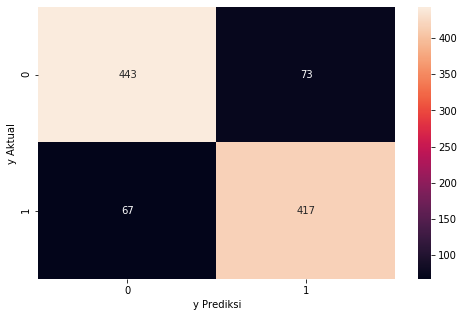

In [222]:
# Confusion matrix report
print(classification_report(y_test, y_pred_GS))
# untuk menampilkan visualisasi confusion matrix
f, ax = plt.subplots(figsize=(8,5))
sns.heatmap(confusion_matrix(y_test, y_pred_GS), annot=True, fmt='.0f', ax=ax)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.show()